# t-SNE (t-distributed Stochastic Neighbor Embedding)
    
- t-SNE is a **dimensionality reduction technique** that is well-suited for the visualization of high-dimensional datasets.

- It is particularly useful for visualizing clusters or groups of data points in high-dimensional space.

- t-SNE works by modeling the **similarity** (e.g., Euclidean) between points in high-dimensional space and the similarity between points in the low-dimensional embedding space.

- It then tries to minimize the difference between these two similarities using a cost function.

- t-SNE is a *non-linear technique*, which means that it can capture complex patterns in the data that linear techniques like PCA (Principal Component Analysis) cannot.

- However, t-SNE is **computationally expensive** and is *not suitable for large datasets*.

- t-SNE is often used as a visualization tool in combination with other dimensionality reduction techniques like **PCA (Principal Component Analysis)**.

- t-SNE has two main hyperparameters: `perplexity` and `learning rate`.
  - `perplexity`: controls the number of neighbors that are considered when constructing the similarity matrix in high-dimensional space.
  - `learning rate`: controls the step size during optimization.

- t-SNE is *sensitive to the choice of hyperparameters*, and it is often necessary to experiment with different values to get the best results.

- t-SNE is a **stochastic algorithm**, which means that it can produce different results each time it is run. To get more stable results, it is common to run t-SNE multiple times with different random seeds and average the results.

- Original t-SNE manuscript can be found here - https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf

In [39]:
import numpy as np
import matplotlib.pyplot as plt

## We first create three 2D example classes to work with

In [40]:
# Set the random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Generate 2D data for three different classes, each with points close to their class center
class_1 = np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2))
class_2 = np.random.normal(loc=[6, 6], scale=0.5, size=(100, 2))
class_3 = np.random.normal(loc=[10, 2], scale=0.5, size=(100, 2))

class_1

array([[2.24835708, 1.93086785],
       [2.32384427, 2.76151493],
       [1.88292331, 1.88293152],
       [2.78960641, 2.38371736],
       [1.76526281, 2.27128002],
       [1.76829115, 1.76713512],
       [2.12098114, 1.04335988],
       [1.13754108, 1.71885624],
       [1.49358444, 2.15712367],
       [1.54598796, 1.29384815],
       [2.73282438, 1.88711185],
       [2.0337641 , 1.28762591],
       [1.72780864, 2.05546129],
       [1.42450321, 2.18784901],
       [1.69968066, 1.85415313],
       [1.69914669, 2.92613909],
       [1.99325139, 1.47114454],
       [2.41127246, 1.38957818],
       [2.1044318 , 1.02016494],
       [1.33590698, 2.09843062],
       [2.36923329, 2.08568414],
       [1.94217586, 1.84944815],
       [1.260739  , 1.6400779 ],
       [1.76968061, 2.52856111],
       [2.17180914, 1.11847992],
       [2.16204198, 1.80745886],
       [1.661539  , 2.30583814],
       [2.51549976, 2.46564006],
       [1.58039124, 1.84539381],
       [2.16563172, 2.48777256],
       [1.

------------------
## Now, let's visualize our 3 classes

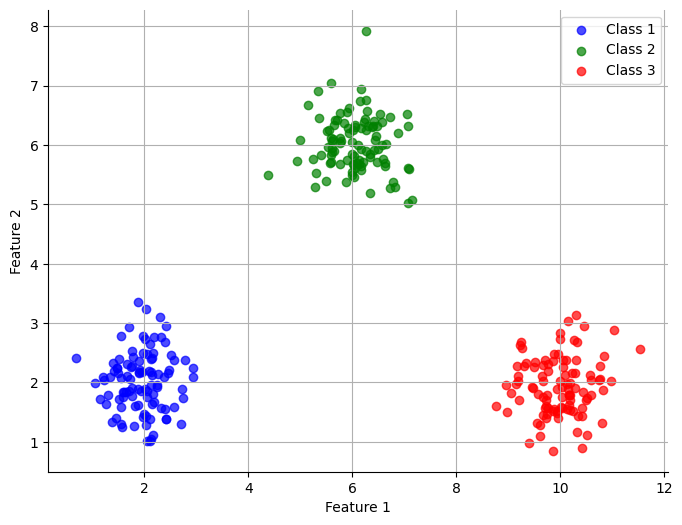

In [41]:
%matplotlib inline

# Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot for each class with different colors and labels
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue',  label='Class 1', alpha=0.7)
plt.scatter(class_2[:, 0], class_2[:, 1], color='green', label='Class 2', alpha=0.7)
plt.scatter(class_3[:, 0], class_3[:, 1], color='red',   label='Class 3', alpha=0.7)

# Customize axes
plt.gca().spines['top'].set_color('none')      # Remove the top spine
plt.gca().spines['right'].set_color('none')    # Remove the right spine

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

--------------------
## Let's use t-SNE to reduce the dimensionality of the data

In [42]:
from sklearn.manifold import TSNE

# Combine the data into a single array
data = np.vstack([class_1, class_2, class_3])

# Create the t-SNE object
tsne = TSNE(
    n_components=1,  # Reduce the dimensionality to 1
    perplexity=30,
    metric='euclidean',
    random_state=RANDOM_SEED
)

# Perform t-SNE on the combined data
tsne_transformed = tsne.fit_transform(data)

----------------------
## Let's visualize our data after using t-SNE

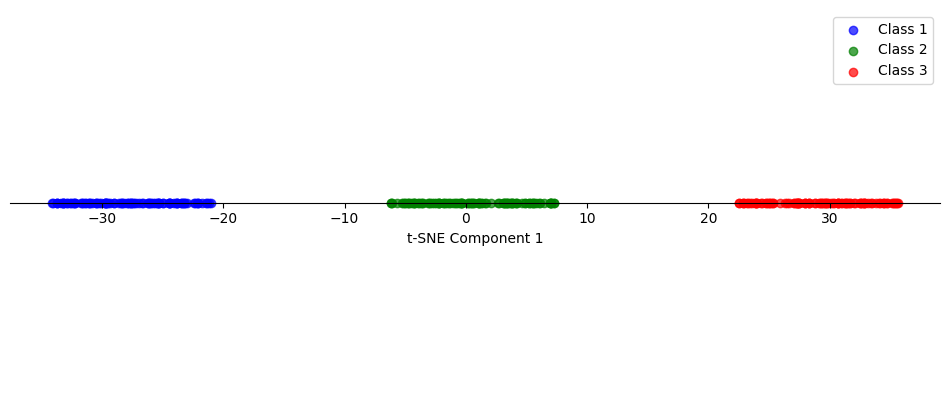

In [43]:
# Create the plot
plt.figure(figsize=(12, 5))

# Scatter plot for each class with different colors and labels
plt.scatter(tsne_transformed[:100],    np.zeros(100), color='blue',  label='Class 1', alpha=0.7)
plt.scatter(tsne_transformed[100:200], np.zeros(100), color='green', label='Class 2', alpha=0.7)
plt.scatter(tsne_transformed[200:],    np.zeros(100), color='red',   label='Class 3', alpha=0.7)

# Customize axes
ax = plt.gca()
ax.spines['top'].set_color('none')        # Remove the top spine
ax.spines['right'].set_color('none')      # Remove the right spine
ax.spines['left'].set_color('none')       # Remove the left spine
ax.spines['bottom'].set_position('zero')  # Position x-axis at y=0
plt.yticks([])                            # Remove y-axis ticks

# Add labels and legend
plt.xlabel('t-SNE Component 1')
plt.legend(loc='upper right')
plt.grid(False)  # Optional: turn off the grid

# Show the plot
plt.show()